### Lecture 21: Handling Missing Values using Simple Imputer class & Pandas (End of Distribution)

Steps (Using pandas)
1. Checking which columns have Missing values
2. Splitting data into training & testing
3. Seperating columns on which we apply Imputation
 * Used when not MCAR
4. Add Flag column ( for columns having NA values)
4. Getting EOD values for skewed or normal distribution 
5. Replacing missing values with EOD value
6. Visualizing Changes 

Importing Useful Libraries

In [194]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Importing Data

In [195]:
df=pd.read_csv('insurance.csv',usecols=['age','bmi','smoker'])
df.head()


,age,bmi,smoker
0,19.0,27.900,yes
1,18.0,33.770,no
2,28.0,33.000,no
3,33.0,22.705,no
4,32.0,28.880,no


Step 1

In [196]:
df.isnull().mean()*100

age       17.638266
bmi        9.417040
smoker     0.000000
dtype: float64

Step 2

In [197]:
X=df.drop(columns='smoker',axis=1)
Y=df.smoker

In [198]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [199]:
print(X_train.shape)
print(X_test.shape)

(1070, 2)
(268, 2)


Step 3

In [200]:
col=[var for var in X_train.columns if X_train[var].isnull().mean()>0]

In [201]:
print(col)


['age', 'bmi']


In [202]:
X_train.sample(20)

,age,bmi
978,NaN,39.995
1105,NaN,31.240
325,NaN,NaN
441,33.0,33.500
1076,NaN,32.000
46,18.0,38.665
207,35.0,27.740
624,59.0,28.785
738,23.0,31.730
392,48.0,31.445


Step 4

In [203]:
X_train['age_flag']=X_train['age'].isna().astype(int)
X_train['bmi_flag']=X_train['bmi'].isna().astype(int)

X_test['age_flag']=X_test['age'].isna().astype(int)
X_test['bmi_flag']=X_test['bmi'].isna().astype(int)

Step 5

Checking whether distribution is skewed or normal

<Axes: ylabel='Density'>

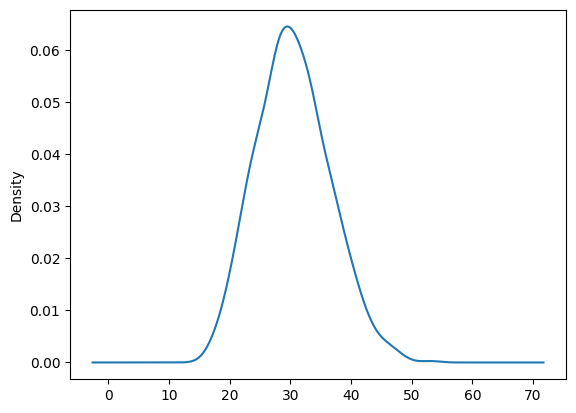

In [204]:
X_train['bmi'].plot(kind='kde')

For normal distribution use: (mean+3*std)

For skewed distribution use: (Q1-1.5 * IQR) or (Q3+1.5*IQR)
IQR=Q3-Q1

In [205]:
Q1=X_train['bmi'].quantile(0.25)
Q3=X_train['bmi'].quantile(0.75)
IQR=Q3-Q1

Step 5

In [206]:
EOD_value= X_train['bmi'].mean()+3*X_train['bmi'].std()

Step 6

In [207]:

X_train['EOD']=X_train['bmi'].fillna(EOD_value)

X_test['EOD']=X_test['bmi'].fillna(EOD_value)

Step 7: Visualization

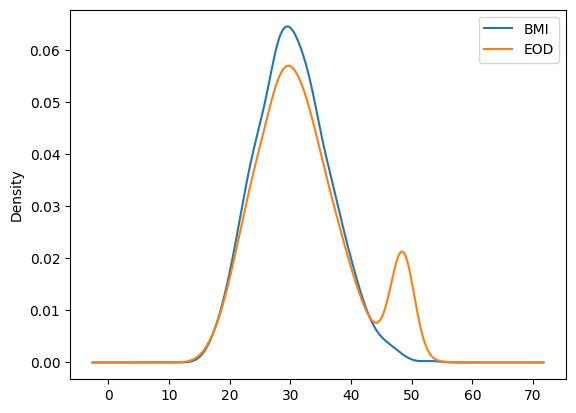

In [208]:
# BMI
fig=plt.figure()
axis=fig.add_subplot(111)

X_train['bmi'].plot(kind='kde',ax=axis,label='BMI')
X_train['EOD'].plot(kind='kde',ax=axis,label='EOD')
axis=plt.legend()

In [209]:
X_train.corr()

,age,bmi,age_flag,bmi_flag,EOD
age,1.000000,0.087079,NaN,0.003942,0.061839
bmi,0.087079,1.000000,-0.039890,NaN,1.000000
age_flag,NaN,-0.039890,1.000000,-0.057048,-0.067069
bmi_flag,0.003942,NaN,-0.057048,1.000000,0.681508
EOD,0.061839,1.000000,-0.067069,0.681508,1.000000


In [210]:
X_train.cov()

,age,bmi,age_flag,bmi_flag,EOD
age,198.625615,7.375952,0.000000,0.016964,6.913444
bmi,7.375952,36.396240,-0.092492,0.000000,36.396240
age_flag,0.000000,-0.092492,0.143138,-0.006369,-0.198850
bmi_flag,0.016964,0.000000,-0.006369,0.087077,1.575984
EOD,6.913444,36.396240,-0.198850,1.575984,61.412796


In [211]:
print(f'Variance Before: {X_train['bmi'].var()}\nAfter EOD Imputation: {X_train['EOD'].var()}')

Variance Before: 36.3962399513661
After EOD Imputation: 61.41279612975281


Steps (Using sk-learn)
1. Checking which columns have Missing values
2. Splitting data into training & testing
3. Seperating columns on which we apply Imputation
 * Used when not MCAR
4. Add Flag column ( for columns having NA values)
5. Make Function of Simple Imputer Class
6. Fit_Transform Input Data (Training/Test)
7. Making New DataFrame with changes (For visualization)
8. Visualizing Changes 

Importing Useful Libraries

In [212]:

from sklearn.impute import SimpleImputer

Step 5 (Skipped Step 4 as we have done it earlier)

In [213]:
# Making variable of SI class
SI_EOD=SimpleImputer(strategy='constant',fill_value=EOD_value)

Step 6

In [214]:
SI_EOD.fit(X_train)

SimpleImputer(fill_value=np.float64(48.53193264120318), strategy='constant')

In [215]:
X_train_EOD=SI_EOD.transform(X_train)
X_test_EOD=SI_EOD.transform(X_test)

Step 7

In [216]:
df_EOD=pd.DataFrame(X_train_EOD,columns=X_train.columns)


Visualization

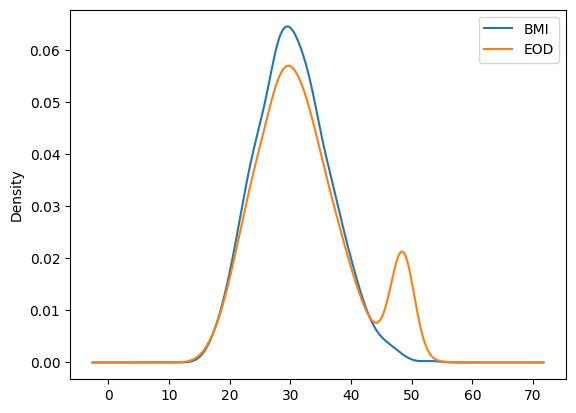

In [217]:
# BMi

fig=plt.figure()
axis=fig.add_subplot(111)

X_train['bmi'].plot(kind='kde',ax=axis,label='BMI')
df_EOD['bmi'].plot(kind='kde',ax=axis,label='EOD')

axis=plt.legend()

In [218]:
print(f'Variance Before: {X_train['bmi'].var()}\nAfter EOD Imputation: {df_EOD['bmi'].var()}')

Variance Before: 36.3962399513661
After EOD Imputation: 61.41279612975281
